# DATA ANALYSIS & QUALITY ASSESSMENT - TASK_2

## 0.  Import Packages

### importing relevant libraries

In [263]:
#removes warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [264]:
#for Data wrangling and analysis
import pandas as pd 
import numpy as np

#for data visualations
import seaborn as sns
# Set plot style
sns.set(color_codes=True)

# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)
#imput values in place of missing values or NaNs
from sklearn.impute import SimpleImputer
#plot and show graphs
import matplotlib.pyplot as plt

%matplotlib inline
# to read files

import csv
# for dates
import datetime

import pickle




### 1.  Loading data

#### Data directory

In [279]:
train_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_data.csv")
churn_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_output.csv")
history_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_hist_data.csv")

The data were imported directly into dataframe from file local location.

## Exploration of  history_data

In [277]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


From above we can already see that there are a lot of NaN values. We will replace or remove those values later.

The ﬁrst 5 rows of the dataframe also show us that there is numeric data and categorical data, which we will need to transform to the right form for machine larning purpose.


In [272]:
# checking the data type
type(training_hist_data)

pandas.core.frame.DataFrame

In [273]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


It seems the churn data is in the correct format as it shows 0 for  not churned and  1 for  churned. There would be no need to convert.

In [278]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


a lot of values are zeros in the historic data

In [107]:
#checking the number of rows and columns
print("training_hist_data shape:",training_hist_data.shape)

training_hist_data shape: (193002, 8)


In [108]:
training_hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [109]:
#statistical summary of training_hist_data
training_hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### OBSERVATIONS

There are 193002 records and 8 columns in the training_hist_data. There is a need to drop the id column or reindex. There are negative price values in price_p1_fix	price_p2_fix	price_p3_fix and since they are prices for power, this a concern as it means there was loss,this can skew the dataset


### CHECKING FOR DUPLICATES

In [110]:
duplicates = training_hist_data.duplicated()
training_hist_data[duplicates].sum()

id              0.0
price_date      0.0
price_p1_var    0.0
price_p2_var    0.0
price_p3_var    0.0
price_p1_fix    0.0
price_p2_fix    0.0
price_p3_fix    0.0
dtype: float64

### CHECKING FOR MISSING VALUES

In [111]:
training_hist_data.isnull().sum()


id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [112]:
training_hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [113]:
training_hist_data['price_date'].value_counts()


2015-12-01    16094
2015-08-01    16094
2015-07-01    16090
2015-11-01    16087
2015-10-01    16085
2015-06-01    16085
2015-09-01    16082
2015-02-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [114]:
training_hist_data['price_date'] = training_hist_data['price_date'].fillna(method='ffill')

In [115]:
training_hist_data['price_p1_var'].value_counts()


0.152445    6291
0.151367    5652
0.125976    5139
0.127566    4373
0.147600    4285
            ... 
0.154806       1
0.149091       1
0.205018       1
0.114227       1
0.145001       1
Name: price_p1_var, Length: 1853, dtype: int64

In [116]:
 training_hist_data['price_p1_var'] = training_hist_data['price_p1_var'].fillna(method='ffill')

In [117]:
training_hist_data['price_p2_var'].value_counts()

0.000000    86802
0.103395     5139
0.105428     4766
0.100491     4101
0.106863     2866
            ...  
0.094129        1
0.100490        1
0.093260        1
0.085476        1
0.087666        1
Name: price_p2_var, Length: 1189, dtype: int64

In [118]:
 training_hist_data['price_p2_var'] = training_hist_data['price_p1_var'].fillna(method='ffill')

In [119]:
training_hist_data['price_p3_var'].value_counts()

0.000000    111475
0.071536      5139
0.073487      4766
0.074516      4101
0.075004      2860
             ...  
0.085680         1
0.064518         1
0.069671         1
0.072629         1
0.068801         1
Name: price_p3_var, Length: 711, dtype: int64

In [120]:
 training_hist_data['price_p3_var'] = training_hist_data['price_p3_var'].fillna(method='ffill')

In [121]:
training_hist_data['price_p1_fix'].value_counts()

44.444710    38491
44.266930    33399
40.728885    33151
44.266931    32718
40.565969    22476
             ...  
42.043426        1
45.262934        1
14.940000        1
41.895551        1
46.657330        1
Name: price_p1_fix, Length: 69, dtype: int64

In [122]:
 training_hist_data['price_p1_fix'] = training_hist_data['price_p1_fix'].fillna(method='ffill')

In [123]:
training_hist_data['price_p2_fix'].value_counts()

 0.000000     111630
 24.437330     33144
 24.339581     22477
 24.339578     13554
 36.490689      4092
 36.344726      2472
 36.344721      1588
 24.937330       965
 24.837586       537
 24.837581       517
 24.770664       303
 25.103997       226
 24.437328        40
 19.586654        13
 25.321262        12
 19.508306        11
 36.490692        10
-0.097749          7
 36.392937         7
 36.392940         5
 9.466286          5
 24.339576         4
 9.774932          4
 9.466284          3
 24.612612         3
 0.069113          3
 0.095556          2
 25.437330         2
-0.097752          2
 19.549864         2
 25.270663         1
 25.603996         1
 24.612614         1
Name: price_p2_fix, dtype: int64

In [124]:
 training_hist_data['price_p2_fix'] = training_hist_data['price_p2_fix'].fillna(method='ffill')

In [125]:
training_hist_data['price_p3_fix'].value_counts()

 0.000000     111628
 16.291555     33156
 16.226389     22477
 16.226383     13554
 8.367731       4092
 8.334260       2477
 8.334263       1590
 16.791555       965
 16.724391       539
 16.724389       517
 16.624889       303
 16.958222       226
 16.291560        40
 14.334178        13
 14.276842        11
 8.367732         10
 8.302559          7
-0.065166          7
 6.927750          5
 8.302565          5
 6.516622          4
 6.927756          3
 16.408406         3
-0.065172          2
 13.033244         2
 17.291555         2
 16.226388         2
 16.408411         1
 17.458221         1
 17.124888         1
Name: price_p3_fix, dtype: int64

In [126]:
 training_hist_data['price_p3_fix'] = training_hist_data['price_p1_fix'].fillna(method='ffill')

### OBSERVATION

Out of the 8 columns there are 6 columns with 1359 data,  we may imput the median or mean depending if these columns are important to the model otherwise drop them. the 'price_date' colume may be replace with most frequent. There is no duplicate in training_hist_data.
There is consistency in the date format. 

In [127]:
#impting most frequent to date column
from sklearn.impute import KNNImputer

imputer = KNNImputer()
training_hist_data['price_date'] = training_hist_data['price_date'].fillna(method='ffill')
training_hist_data['price_date'].value_counts()
training_hist_data['price_date'].fillna(training_hist_data['price_date'].mode(), inplace=True)

In [128]:
training_hist_data.price_date.isnull().sum()

0

<AxesSubplot:xlabel='price_p1_var'>

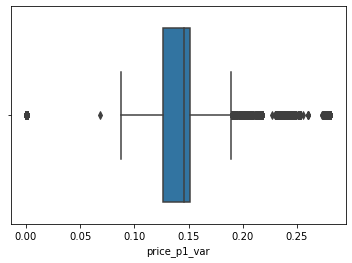

In [129]:
sns.boxplot(x='price_p1_var', data=training_hist_data)

<AxesSubplot:xlabel='price_p2_var'>

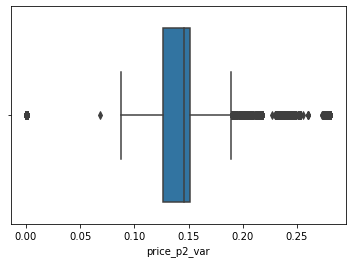

In [130]:
sns.boxplot(x='price_p2_var', data=training_hist_data)

<AxesSubplot:xlabel='price_p3_var'>

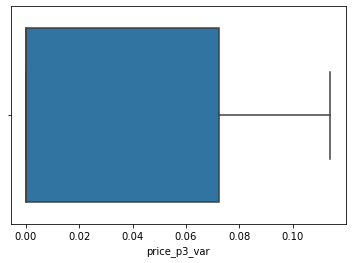

In [131]:
sns.boxplot(x='price_p3_var', data=training_hist_data)

<AxesSubplot:xlabel='price_p3_fix', ylabel='count'>

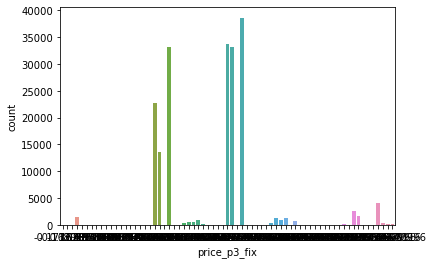

In [132]:
sns.countplot(x='price_p3_fix', data=training_hist_data)

In [100]:
#sns.countplot(x='price_p2_fix', data=training_hist_data)

In [99]:
#sns.countplot(x='price_p1_fix', data=training_hist_data)

In [133]:

#training_hist_data.drop(columns =['id'])


## EXPLORATION OF case_training_data

In [134]:
case_training_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [135]:
#checking the number of rows and columns
print("case_training_data:",case_training_data.shape)

case_training_data: (16096, 32)


In [136]:
case_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

### CHECKING FOR DUPLICATES

In [137]:
duplicates = case_training_data.duplicated()
case_training_data[duplicates].sum()

id                          0.0
activity_new                0.0
campaign_disc_ele           0.0
channel_sales               0.0
cons_12m                    0.0
cons_gas_12m                0.0
cons_last_month             0.0
date_activ                  0.0
date_end                    0.0
date_first_activ            0.0
date_modif_prod             0.0
date_renewal                0.0
forecast_base_bill_ele      0.0
forecast_base_bill_year     0.0
forecast_bill_12m           0.0
forecast_cons               0.0
forecast_cons_12m           0.0
forecast_cons_year          0.0
forecast_discount_energy    0.0
forecast_meter_rent_12m     0.0
forecast_price_energy_p1    0.0
forecast_price_energy_p2    0.0
forecast_price_pow_p1       0.0
has_gas                     0.0
imp_cons                    0.0
margin_gross_pow_ele        0.0
margin_net_pow_ele          0.0
nb_prod_act                 0.0
net_margin                  0.0
num_years_antig             0.0
origin_up                   0.0
pow_max 

In [138]:
#statistical summary of training_hist_data
case_training_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


campaign electricy colum may be drop, it is filled with NaN and not relevant to the model. most minimum values are negative.

In [141]:
case_training_data.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

### OBSERVATIONS

There are 20 columns with missing values,These columns are relevant to this analysis, we may imput mean or median

activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_discount_energy      126
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
margin_gross_pow_ele           13
margin_net_pow_ele             13
net_margin                     15
origin_up                      87
pow_max                         3

In [142]:
case_training_data['activity_new'].value_counts()

apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
ckfxocssowaeipxueikxcmaxdmcduxsa     189
                                    ... 
oolfsafdpblfmubuscwbbuifuxdxkfsd       1
waixukdfidxusmdwibmxxkkxbbmbslbf       1
cwkwaxadbfukekuspislmbipbkxdudla       1
pudpxobkpuxbalsmeimfkwocseoamsoi       1
laslwixpcspcffiadlfkeosicpsuaboc       1
Name: activity_new, Length: 419, dtype: int64

#### OBSERVATION 
The 'activity_new' column contains encoded data

In [143]:
 case_training_data['campaign_disc_ele'].value_counts()

Series([], Name: campaign_disc_ele, dtype: int64)

In [144]:
# this code gives a clearer of campaign_disc_ele column
case_training_data.campaign_disc_ele

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16091   NaN
16092   NaN
16093   NaN
16094   NaN
16095   NaN
Name: campaign_disc_ele, Length: 16096, dtype: float64

#### OBSERVATION
The case_training_data campaign_disc_ele column is all NaN

In [145]:
 case_training_data['cons_12m'].value_counts()

0          126
2882597     28
5322441     25
3329244     24
4012564     23
          ... 
18361        1
6198         1
2100         1
22320        1
26649        1
Name: cons_12m, Length: 12002, dtype: int64

### Observations
There was 126 zero electricty consumption in the past 12 months. the 

In [146]:
case_training_data['date_end'].value_counts()

2016-02-01    152
2016-08-01    138
2016-09-01    122
2016-12-31    118
2016-10-05    116
             ... 
2013-05-06      1
2017-01-28      1
2006-08-26      1
2017-06-13      1
2017-06-11      1
Name: date_end, Length: 371, dtype: int64

In [147]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
case_training_data['date_end'] = case_training_data['date_end'].fillna(method='ffill')
case_training_data['date_end'].value_counts()
case_training_data['date_end'].fillna(case_training_data['date_end'].mode(), inplace=True)

### Observation 
we may replace the 2 missing values in 'date_end' with most frequent date. The column is important to churning.

In [148]:
case_training_data['date_first_activ'].value_counts()    


2009-07-14    34
2010-09-04    33
2012-02-01    28
2010-06-10    21
2013-06-14    19
              ..
2011-08-17     1
2011-07-27     1
2012-12-11     1
2012-10-05     1
2008-09-17     1
Name: date_first_activ, Length: 1133, dtype: int64

### Observations
the missing in data 'date_first_activ' was 12588 we may imput '2009-07-14' since this column have feature importance to model.

In [149]:
case_training_data['date_modif_prod'].value_counts()     


2015-11-01    592
2015-05-24    275
2015-12-17    202
2015-12-16    181
2015-11-18    179
             ... 
2011-05-04      1
2008-08-07      1
2003-08-13      1
2013-12-21      1
2013-07-08      1
Name: date_modif_prod, Length: 2307, dtype: int64

In [150]:
 case_training_data['date_renewal'].value_counts()

2015-06-23    637
2015-03-09    517
2015-07-04    311
2015-02-09    281
2015-10-11    243
             ... 
2014-01-03      1
2014-04-15      1
2014-01-14      1
2013-07-08      1
2013-12-30      1
Name: date_renewal, Length: 398, dtype: int64

### OBSERVATIONS
There are 16096 records and 32 columns in case_training_data
The case_training_data id column should be drop or reindex,there are lots of NaNs and missing values, There are no duplicates in case_training_data.


forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_discount_energy      126
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
 since these are forecasts we may need imput mean.

## Exploration of ml_case_training_output


In [151]:
ml_case_training_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


## MORE ON DATA MANIPULATION AND WRANGLING

 ## DATA AGGREGATION 

In [155]:
#case_training_data.head()
#training_hist_data['id'].iloc[-1]
#case_training_data.insert(0, 'id', range(4001, 4001 + len(case_training_data)))
#case_training_data.head()
#case_training_data.head()



In [156]:
final_df_ml = pd.concat([case_training_data, training_hist_data], ignore_index=True, sort=False)
final_df_ml

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,NaN,...,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,NaN,...,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660.0,0.0,0.0,2009-08-21,2016-08-30,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209093,16f51cdc2baa19af0b940ee1b3dd17d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-08-01,0.119916,0.119916,0.076257,40.728885,24.43733,40.728885
209094,16f51cdc2baa19af0b940ee1b3dd17d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-09-01,0.119916,0.119916,0.076257,40.728885,24.43733,40.728885
209095,16f51cdc2baa19af0b940ee1b3dd17d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-10-01,0.119916,0.119916,0.076257,40.728885,24.43733,40.728885
209096,16f51cdc2baa19af0b940ee1b3dd17d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-11-01,0.119916,0.119916,0.076257,40.728885,24.43733,40.728885


### TREATING NaN and Missing Values

In [157]:
final_df_ml.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,16096.000000,16081.000000,16096.000000,16093.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,1.347788,217.987028,5.030629,20.604131,0.141006,0.141006,0.030689,43.326196,10.689397,43.326196
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,1.459808,366.742030,1.676101,21.772421,0.025091,0.025091,0.036333,5.431296,12.853858,5.431296
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.177779
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,1.000000,51.970000,4.000000,12.500000,0.125976,0.125976,0.000000,40.728885,0.000000,40.728885
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,1.000000,119.680000,5.000000,13.856000,0.146033,0.146033,0.000000,44.266930,0.000000,44.266930
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,1.000000,275.810000,6.000000,19.800000,0.151635,0.151635,0.072558,44.444710,24.339581,44.444710
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,32.000000,24570.650000,16.000000,500.000000,0.280700,0.280700,0.114102,59.444710,36.490692,59.444710


In [160]:
final_df_ml.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,NaN,...,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,NaN,...,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660.0,0.0,0.0,2009-08-21,2016-08-30,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
final_df_ml.isnull().sum()

channel_sales               197220
cons_12m                    193002
cons_gas_12m                193002
cons_last_month             193002
date_activ                  193002
date_end                    193002
date_first_activ            205590
date_modif_prod             193159
date_renewal                193042
forecast_base_bill_ele      205590
forecast_base_bill_year     205590
forecast_bill_12m           205590
forecast_cons               205590
forecast_cons_12m           193002
forecast_cons_year          193002
forecast_discount_energy    193128
forecast_meter_rent_12m     193002
forecast_price_energy_p1    193128
forecast_price_energy_p2    193128
forecast_price_pow_p1       193128
has_gas                     193002
imp_cons                    193002
margin_gross_pow_ele        193015
margin_net_pow_ele          193015
nb_prod_act                 193002
net_margin                  193017
num_years_antig             193002
origin_up                   193089
pow_max             

In [161]:
#deleting 'campaign_disc_ele','activity_new','id' columns
final_df_ml = final_df_ml.drop(['campaign_disc_ele','activity_new','id'], axis=1)

In [ ]:
#converting date columns from integer to datetime 
final_df_mls['price_date','date_first_activ'] = pd.to_datetime(final_df_mls['price_date'], unit='s') 

In [172]:
final_df_ml.to_csv('final_df_ml.csv')
final_df_ml.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,...,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,...,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,...,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4660.0,0.0,0.0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# BUILDING THE PREDICTIVE MODEL

In [169]:
get_ipython().run_line_magic('matplotlib','inline')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from statsmodels.tools.eval_measures import rmse

from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

from sklearn.tree import DecisionTreeRegressor
#from sklearn import RandomForestRegressor


## Importing the data 

In [237]:
clean_ml_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\final_df_ml.csv")

In [185]:
#dropping NaN
#clean_ml_data = clean_ml_data.dropna(axis='columns', how='all')

In [230]:
#clean_ml_data = clean_ml_data.drop('channel_sales', axis = 1, inplace = True)



In [238]:
#clean_ml_data = clean_ml_data.drop('origin_up', axis = 1, inplace = True)

In [239]:
type(clean_ml_data)

pandas.core.frame.DataFrame

In [240]:
clean_ml_data.head()

,Unnamed: 0,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,...,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0,lmkebamcaaclubfxadlmueccxoimlema,309275.0,0.0,10025.0,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,...,3.0,ldkssxwpmemidmecebumciepifcamkci,180.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,...,3.0,lxidpiddsbxsbosboudacockeimpuepw,43.648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,4660.0,0.0,0.0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,...,6.0,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
clean_ml_data['date_end'] = clean_ml_data['date_end'].fillna(method='ffill')
clean_ml_data['date_end'].fillna(clean_ml_data['date_end'].mode(), inplace=True)

clean_ml_data['date_first_activ'] = clean_ml_data['date_first_activ'].fillna(method='ffill')
clean_ml_data['date_first_activ'].fillna(clean_ml_data['date_first_activ'].mode(), inplace=True)

clean_ml_data['price_p1_var'] = clean_ml_data['price_p1_var'].fillna(method='ffill')
clean_ml_data['price_p1_var'].fillna(clean_ml_data['price_p1_var'].mean(), inplace=True)

clean_ml_data['price_p2_var'] = clean_ml_data['price_p2_var'].fillna(method='ffill')
clean_ml_data['price_p2_var'].fillna(clean_ml_data['price_p2_var'].mean(), inplace=True)

clean_ml_data['price_p3_var'] = clean_ml_data['price_p3_var'].fillna(method='ffill')
clean_ml_data['price_p3_var'].fillna(clean_ml_data['price_p3_var'].mean(), inplace=True)

clean_ml_data['price_p1_fix'] = clean_ml_data['price_p1_fix'].fillna(method='ffill')
clean_ml_data['price_p1_fix'].fillna(clean_ml_data['price_p1_fix'].mean(), inplace=True)

clean_ml_data['price_p2_fix'] = clean_ml_data['price_p2_fix'].fillna(method='ffill')
clean_ml_data['price_p2_fix'].fillna(clean_ml_data['price_p2_fix'].mean(), inplace=True)

clean_ml_data['price_p3_fix'] = clean_ml_data['price_p1_fix'].fillna(method='ffill')
clean_ml_data['price_p3_fix'].fillna(clean_ml_data['price_p1_fix'].mean(), inplace=True)

clean_ml_data['date_modif_prod'] = clean_ml_data['date_modif_prod'].fillna(method='ffill')
clean_ml_data['date_modif_prod'].fillna(clean_ml_data['date_modif_prod'].mode(), inplace=True)

clean_ml_data['date_renewal'] = clean_ml_data['date_renewal'].fillna(method='ffill')
clean_ml_data['date_renewal'].fillna(clean_ml_data['date_renewal'].mode(), inplace=True)

In [242]:
clean_ml_data.date_first_activ

0         2012-08-27
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
209093    2012-08-27
209094    2012-08-27
209095    2012-08-27
209096    2012-08-27
209097    2012-08-27
Name: date_first_activ, Length: 209098, dtype: object

In [243]:
clean_ml_data['date_first_activ'] = clean_ml_data['date_first_activ'].fillna(0)

In [244]:
clean_ml_data.isnull().sum()

Unnamed: 0                       0
channel_sales               197220
cons_12m                    193002
cons_gas_12m                193002
cons_last_month             193002
date_activ                  193002
date_end                         0
date_first_activ                 0
date_modif_prod                  0
date_renewal                     0
forecast_base_bill_ele      205590
forecast_base_bill_year     205590
forecast_bill_12m           205590
forecast_cons               205590
forecast_cons_12m           193002
forecast_cons_year          193002
forecast_discount_energy    193128
forecast_meter_rent_12m     193002
forecast_price_energy_p1    193128
forecast_price_energy_p2    193128
forecast_price_pow_p1       193128
has_gas                     193002
imp_cons                    193002
margin_gross_pow_ele        193015
margin_net_pow_ele          193015
nb_prod_act                 193002
net_margin                  193017
num_years_antig             193002
origin_up           

In [193]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = clean_ml_data.iloc[:,0:20]  #independent columns
#y = clean_ml_data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))

In [248]:
clean_ml_data = final_df_ml.drop(['channel_sales','origin_up'], axis=1, inplace = True) 

In [255]:
X = 'date_end'
y= [['date_first_activ','date_modif_prod','date_renewal','price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix']]
# Break off validation set from training data
X_train, X_test, y_train_, y_test = train_test_split (X,y, test_size =0.2, random_state =1)

# "Cardinality" #categorical_cols = [cname for cname in clean_ml_data.columns if
                    #clean_ml_data[cname].nunique() < 10 and 
                    #clean_ml_data[cname].dtype == "object"]

# Select numerical columns
#numerical_cols = [cname for cname in clean_ml_data.columns if 
                #clean_ml_data[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
#my_cols = categorical_cols + numerical_cols"""


ValueError: Found input variables with inconsistent numbers of samples: [8, 1]

## Linear Regression

In [218]:
#Selecting the features needed for the model
#X = clean_ml_data.[['date_first_activ' , 'date_modif_prod','date_renewal' ,'price_p1_var' ,'price_p2_var' , 'price_p3_var' ,'price_p1_fix', 'price_p2_fix' ,'price_p3_fix']]
#y=['date_end']


In [219]:
#initializing linear regression model
Prelim_reg = linear_model.LinearRegression()

In [224]:
# splitting data int 80 percent train and 20 percent test.
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2, random_state =1)

In [1]:

#Prelim_reg.fit(X_train,y_train)